In [12]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn

In [2]:
my_data = pandas.read_csv('politics and outlook.csv', low_memory = False )
# added in W1_F2A into the csv

In [3]:
data = my_data.copy()
columns = ['W1_A1', 'W1_A4', 'W1_A10', 'W1_B4', 'W1_F2', 'W1_F6']
for x in columns:
    data[x] = data[x].replace(-1, numpy.nan)    #change all missing values to NaN
    pandas.to_numeric(data[x])    #convert data inside to numeric to help with msthematical functions if necessary


In [4]:
### reversed values such that higher = more interest/more optimistic ###
### changed frequency of discussion to reflect the estimated number of times per month###

How interested are you in what's going on in government and politics?
1.0    198
2.0    354
3.0    658
4.0    679
5.0    389
NaN     16
Name: A1_FREQ, dtype: int64
      A1_FREQ  Cum_prop
1.0  0.086312  0.086312
2.0  0.154316  0.240628
3.0  0.286835  0.527463
4.0  0.295990  0.823452
5.0  0.169573  0.993025
NaN  0.006975  1.000000
count    2278.000000
mean        3.310360
std         1.178339
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: A1_FREQ, dtype: float64
count     2278.0
unique       5.0
top          4.0
freq       679.0
Name: A1_CAT, dtype: float64


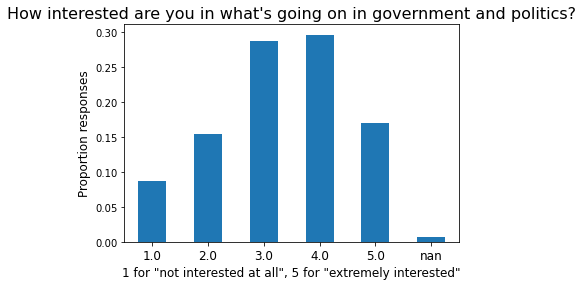

In [7]:
print("How interested are you in what's going on in government and politics?")
recode1 = {1:5, 2:4, 3:3, 4:2, 5:1}    #a dictionary to reverse what the numbers represent
data['A1_FREQ'] = data['W1_A1'].map(recode1)    #recode and give the variable a new name
count1 = data['A1_FREQ'].value_counts(dropna = False).sort_index(ascending = True)   #sort = False to make sure values displayed in original order
#instead of by the count value, include dropna = False for NaN values to be counted
perc1 = data['A1_FREQ'].value_counts(normalize = True, dropna = False).sort_index(ascending = True)   #normalize for fraction
perc1a = perc1.to_frame()    #convert series to dataframe to be able to add column
perc1a['Cum_prop'] = perc1a.cumsum()    #add new column to the table
print(count1)
print(perc1a)

print(data['A1_FREQ'].describe())
data['A1_CAT'] = data['A1_FREQ'].astype('category')
print(data['A1_CAT'].describe())    #get a different description when it's a category

perc1.plot.bar()
plt.title("How interested are you in what's going on in government and politics?", fontsize=16)
plt.ylabel('Proportion responses',fontsize=12)
plt.xlabel('1 for "not interested at all", 5 for "extremely interested"', fontsize = 12)
plt.xticks(rotation = 0, fontsize=12)
plt.show()

Do you remember whether or not you voted in that election? 1, no
1.0     502
2.0    1783
NaN       9
Name: A4_REV, dtype: int64
       A4_REV  Cum_prop
1.0  0.218832  0.218832
2.0  0.777245  0.996077
NaN  0.003923  1.000000


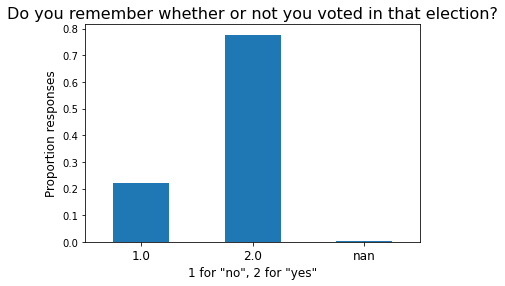

In [59]:
print("Do you remember whether or not you voted in that election? 1, no")
recode2 = {1:2, 2:1}    #a dictionary to reverse what the numbers represent
data['A4_REV'] = data['W1_A4'].map(recode2)    #recode and give the variable a new name
count2 = data['A4_REV'].value_counts(dropna = False).sort_index(ascending = True)
perc2 = data['A4_REV'].value_counts(sort = False, normalize = True, dropna = False).sort_index(ascending = True)
print(count2)
perc2a = perc2.to_frame()
perc2a['Cum_prop'] = perc2a.cumsum()
print(perc2a)

perc2.plot.bar()
plt.title("Do you remember whether or not you voted in that election?", fontsize=16)
plt.ylabel('Proportion responses',fontsize=12)
plt.xlabel('1 for "no", 2 for "yes"', fontsize = 12)
plt.xticks(rotation = 0, fontsize=12)
plt.show()

How often, if ever, do you discuss politics with your family or friends? 1, never. 5, everyday
0.0     349
2.0     796
6.0     557
14.0    344
30.0    233
NaN      15
Name: A10_NEW, dtype: int64
       A10_NEW  Cum_prop
0.0   0.152136  0.152136
2.0   0.346992  0.499128
6.0   0.242807  0.741935
14.0  0.149956  0.891892
30.0  0.101569  0.993461
NaN   0.006539  1.000000


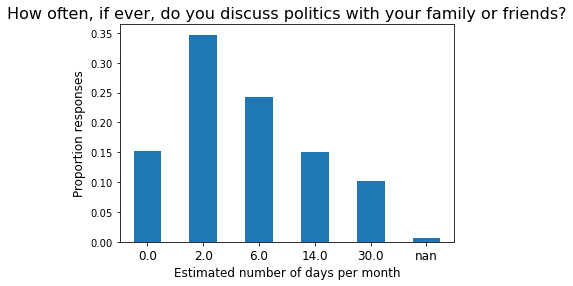

In [15]:
print("How often, if ever, do you discuss politics with your family or friends? 1, never. 5, everyday")
#change the values to reflect how many times per month instead
recode3 = {1:0, 2:2, 3:6, 4:14, 5:30}
data['A10_NEW'] = data['W1_A10'].map(recode3)
count3 = data['A10_NEW'].value_counts(dropna = False).sort_index(ascending = True)   #sort = False to make sure values displayed in original order
#instead of by the count value, include dropna = False for NaN values to be counted
perc3 = data['A10_NEW'].value_counts(normalize = True, dropna = False).sort_index(ascending = True)   #normalize for fraction
perc3a = perc3.to_frame()    #convert series to dataframe to be able to add column
perc3a['Cum_prop'] = perc3a.cumsum()    #add new column to the table
print(count3)
print(perc3a)

perc3.plot.bar()
plt.title("How often, if ever, do you discuss politics with your family or friends?", fontsize=16)
plt.ylabel('Proportion responses',fontsize=12)
plt.xlabel('Estimated number of days per month', fontsize = 12)
plt.xticks(rotation = 0, fontsize=12)
plt.show()

Generally speaking, how angry do you feel about the way things are going in the country these days? 1, extremely angry
1.0    243
2.0    437
3.0    731
4.0    555
5.0    301
NaN     27
Name: W1_B4, dtype: int64
        W1_B4  Cum_prop
1.0  0.105929  0.105929
2.0  0.190497  0.296425
3.0  0.318657  0.615083
4.0  0.241935  0.857018
5.0  0.131212  0.988230
NaN  0.011770  1.000000


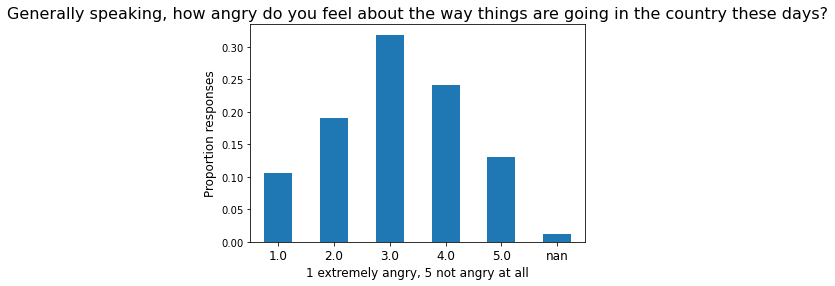

In [35]:
print("Generally speaking, how angry do you feel about the way things are going in the country these days? 1, extremely angry")
#data['B4_FREQ'] = data['W1_B4'].map(recode1)
count4 = data['W1_B4'].value_counts(dropna = False).sort_index(ascending = True)   #sort = False to make sure values displayed in original order
#instead of by the count value, include dropna = False for NaN values to be counted
perc4 = data['W1_B4'].value_counts(normalize = True, dropna = False).sort_index(ascending = True)   #normalize for fraction
perc4a = perc4.to_frame()    #convert series to dataframe to be able to add column
perc4a['Cum_prop'] = perc4a.cumsum()    #add new column to the table
print(count4)
print(perc4a)

perc4.plot.bar()
plt.title("Generally speaking, how angry do you feel about the way things are going in the country these days?", fontsize=16)
plt.ylabel('Proportion responses',fontsize=12)
plt.xlabel('1 extremely angry, 5 not angry at all', fontsize = 12)
plt.xticks(rotation = 0, fontsize=12)
plt.show()

And when you think about the future of the United States as a whole, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic? 1, optimistic, 3, pessimistic
1.0    565
2.0    823
3.0    851
NaN     55
Name: F2_REV, dtype: int64
1.0    851
2.0    823
3.0    565
NaN     55
Name: W1_F2, dtype: int64
       F2_REV  Cum_prop
1.0  0.246295  0.246295
2.0  0.358762  0.605057
3.0  0.370968  0.976024
NaN  0.023976  1.000000


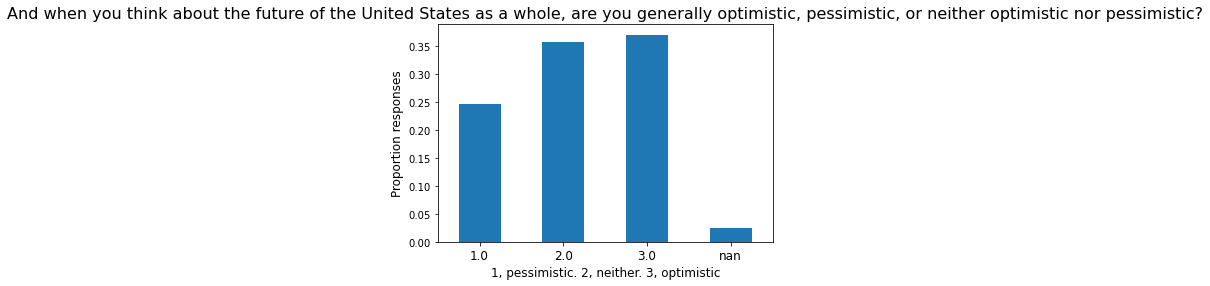

In [36]:
print("And when you think about the future of the United States as a whole, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic? 1, optimistic, 3, pessimistic")
recode5 = {1:3, 2:2, 3:1}    #a dictionary to reverse what the numbers represent
data['F2_REV'] = data['W1_F2'].map(recode5)
count5 = data['F2_REV'].value_counts(sort = False, dropna = False).sort_index(ascending = True)
count5a = data['W1_F2'].value_counts(sort = False, dropna = False).sort_index(ascending = True)   #to confirm the values
perc5 = data['F2_REV'].value_counts(sort = False, normalize = True, dropna = False).sort_index(ascending = True)
print(count5)
print(count5a)
#print(data['F2_REV'].head(n=30)) values are correct
perc5a = perc5.to_frame()
perc5a['Cum_prop'] = perc5a.cumsum()
print(perc5a)

perc5.plot.bar()
plt.title("And when you think about the future of the United States as a whole, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?", fontsize=16)
plt.ylabel('Proportion responses',fontsize=12)
plt.xlabel('1, pessimistic. 2, neither. 3, optimistic', fontsize = 12)
plt.xticks(rotation = 0, fontsize=12)
plt.show()

In [92]:
### TEST ###
# print("Future of America (detailed)")
# sub1 = data['F2_REV']
# sub2 = data['W1_F2A']
# print(sub2.head (n=10))
# print(sub1.head(n=10))
# #sub1 = sub1.fillna
# # def foa(row):
# #     if row['F2_REV'] == 2:
# #         return 4
# # sub1['detailed'] = sub1.apply (lambda row: foa(row))
# # axis = 1 tells python to apply function to each row
# #lambda creates functions without a name
# #print(sub1.head(n=10))


In [37]:
### to make a scale from 1 to 7 combining F2 and F2A ###
# print("Future of America (detailed)")
sub1 = data['F2_REV']    #create a new subcategory of F2
sub2 = data['W1_F2A'].replace(' ', 0)    #new sub of F2A plus fill up space(which was NOT EMPTY)
#changed the replace to 0 because it could not be detected in the if...
sub2 = pandas.to_numeric(sub2)
# print(sub1.head(n=11))
# print(sub2.head(n=11))

for i in range(len(sub2)):
#    if sub2[i] == None or sub1[i] == None:    #dk why but this does not work
    if sub2[i] == -1:    #replace all the missing values
        sub2[i] = None
    elif sub1[i] == 1:
        sub2[i] = sub2[i]
    elif sub1[i] == 2:
        sub2[i] = 4
    elif sub1[i] == 3:
        sub2[i] = sub2[i] + 4
    else:
        sub2[i] = sub1[i]    #to make sure when sub1 gets NaN, sub2 also gets NaN


# print(sub1)
# print(sub1)
# print(sub2.head(n = 26))
# print(sub1[1])
#sub2 = sub2.fillna("NaN")   does not work
#print(sub2.head(n=10))
# axis = 1 tells python to apply function to each row
#lambda creates functions without a name
#print(sub1.head(n=10))

Are you extremely, moderately, or slightly [optimistic/pessimistic]?(combining both F2 and F2A)
1.0    148
2.0    291
3.0    123
4.0    823
5.0    206
6.0    490
7.0    148
NaN     65
Name: W1_F2A, dtype: int64
       W1_F2A  Cum_prop
1.0  0.064516  0.064516
2.0  0.126853  0.191369
3.0  0.053618  0.244987
4.0  0.358762  0.603749
5.0  0.089799  0.693548
6.0  0.213601  0.907149
7.0  0.064516  0.971665
NaN  0.028335  1.000000


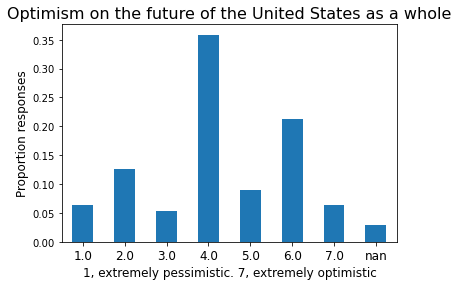

In [38]:
print("Are you extremely, moderately, or slightly [optimistic/pessimistic]?(combining both F2 and F2A)")
data5a = sub2.replace(-1, numpy.nan)
#print(data5a.head(n = 27))
count5b = data5a.value_counts(sort = False, dropna = False).sort_index(ascending = True)   #to confirm the values
perc5b = data5a.value_counts(sort = False, normalize = True, dropna = False).sort_index(ascending = True)
print(count5b)
#print(data['F2_REV'].head(n=30)) values are correct
perc5c = perc5b.to_frame()
perc5c['Cum_prop'] = perc5c.cumsum()
print(perc5c)

perc5b.plot.bar()
plt.title("Optimism on the future of the United States as a whole", fontsize=16)
plt.ylabel('Proportion responses',fontsize=12)
plt.xlabel('1, extremely pessimistic. 7, extremely optimistic', fontsize = 12)
plt.xticks(rotation = 0, fontsize=12)
plt.show()

How far along the road to your American Dream do you think you will ultimately get on a 10-point scale where 1 is not far at all and 10 nearly there?
1.0      70
2.0      59
3.0      98
4.0     152
5.0     362
6.0     336
7.0     440
8.0     350
9.0     165
10.0    203
NaN      59
Name: W1_F6, dtype: int64
         W1_F6  Cum_prop
1.0   0.030514  0.030514
2.0   0.025719  0.056234
3.0   0.042720  0.098954
4.0   0.066260  0.165214
5.0   0.157803  0.323017
6.0   0.146469  0.469486
7.0   0.191805  0.661290
8.0   0.152572  0.813862
9.0   0.071927  0.885789
10.0  0.088492  0.974281
NaN   0.025719  1.000000


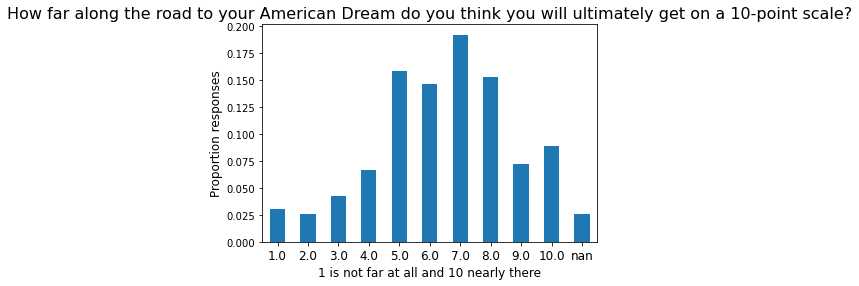

In [39]:
print("How far along the road to your American Dream do you think you will ultimately get on a 10-point scale where 1 is not far at all and 10 nearly there?")
count6 = data['W1_F6'].value_counts(sort = False, dropna = False).sort_index(ascending = True)
perc6 = data['W1_F6'].value_counts(sort = False, normalize = True, dropna = False).sort_index(ascending = True)
print(count6)
perc6a = perc6.to_frame()
perc6a['Cum_prop'] = perc6a.cumsum()
print(perc6a)

perc6.plot.bar()
plt.title("How far along the road to your American Dream do you think you will ultimately get on a 10-point scale?", fontsize=16)
plt.ylabel('Proportion responses',fontsize=12)
plt.xlabel('1 is not far at all and 10 nearly there', fontsize = 12)
plt.xticks(rotation = 0, fontsize=12)
plt.show()

A1_FREQ
1.0    198
2.0    354
3.0    658
4.0    679
5.0    389
dtype: int64


Text(16.424999999999997, 0.5, 'how optimistic')

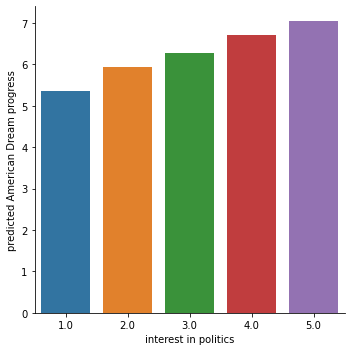

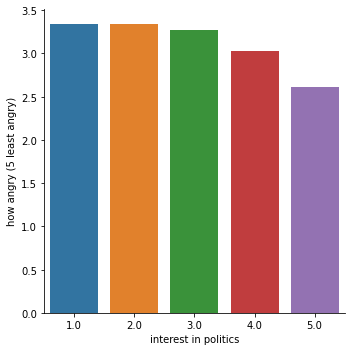

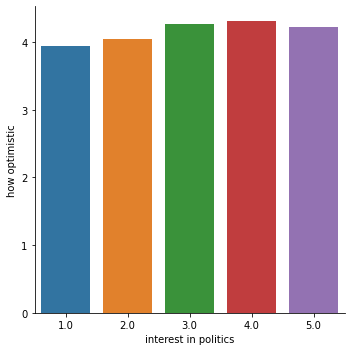

In [58]:
### looking at the relationship between how interested (1-5) and American dream progress (1-10) ###
## will try to combine 3 variables on both sides later ##
# Try making a C-C bar graph first... #

# not sure if this is necessary for now
# #Set PANDAS to show all columns in DataFrame
pandas.set_option('display.max_columns', None)
# #Set PANDAS to show all rows in DataFrame
pandas.set_option('display.max_rows', None)

#another way of getting count, can replace "size" with "mode", "std", etc.
c1 = data.groupby('A1_FREQ').size()
print(c1)
data['A1_CAT'] = data['A1_FREQ'].astype('category')

#to plot the graph, with the mean of the dependent variable on the y axis
seaborn.catplot(x="A1_CAT", y="W1_F6", data=data, kind="bar", ci=None)
plt.xlabel('interest in politics')
plt.ylabel('predicted American Dream progress')
#did not convert explanatory variable to categorical (with 0 and 1) because it seems like it does not make as much sense.

data['F2_NEW'] = data5a
seaborn.catplot(x="A1_CAT", y="W1_B4", data=data, kind="bar", ci=None)
plt.xlabel('interest in politics')
plt.ylabel('how angry (5 least angry)')

seaborn.catplot(x="A1_CAT", y="F2_NEW", data=data, kind="bar", ci=None)
plt.xlabel('interest in politics')
plt.ylabel('how optimistic')

Text(16.424999999999997, 0.5, 'how optimistic')

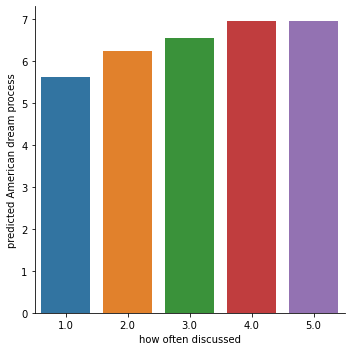

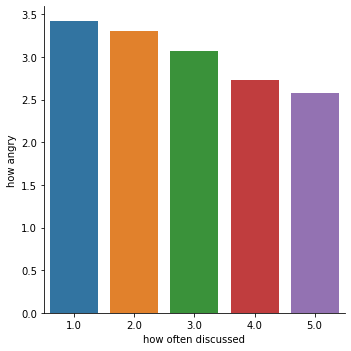

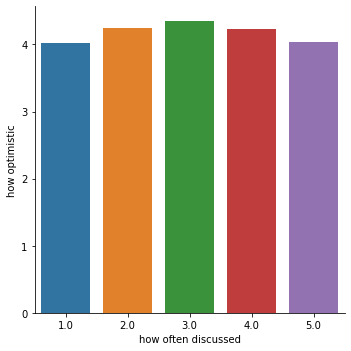

In [57]:
seaborn.catplot(x="W1_A10", y="W1_F6", data=data, kind="bar", ci=None)
plt.xlabel('how often discussed')
plt.ylabel('predicted American dream process')

seaborn.catplot(x="W1_A10", y="W1_B4", data=data, kind="bar", ci=None)
plt.xlabel('how often discussed')
plt.ylabel('how angry')

seaborn.catplot(x="W1_A10", y="F2_NEW", data=data, kind="bar", ci=None)
plt.xlabel('how often discussed')
plt.ylabel('how optimistic')

Text(16.424999999999997, 0.5, 'how optimistic')

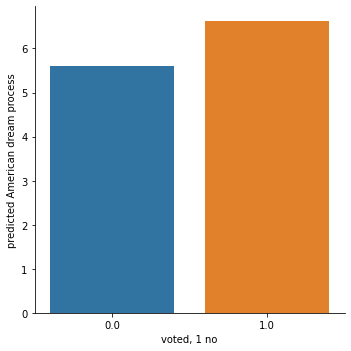

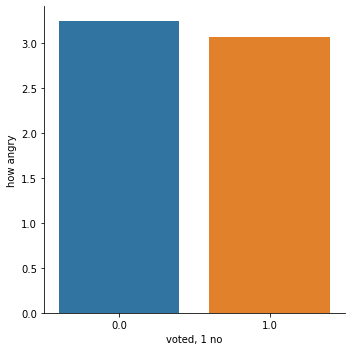

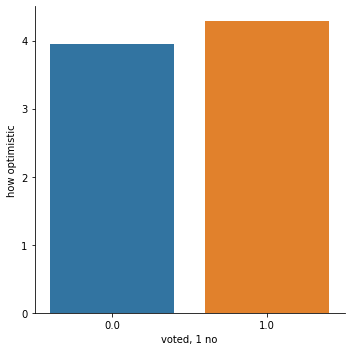

In [60]:
recode_yn = {1:0, 2:1}
data['A4_NEW'] = data['A4_REV'].map(recode_yn)

seaborn.catplot(x="A4_NEW", y="W1_F6", data=data, kind="bar", ci=None)
plt.xlabel('voted, 1 no')
plt.ylabel('predicted American dream process')

seaborn.catplot(x="A4_NEW", y="W1_B4", data=data, kind="bar", ci=None)
plt.xlabel('voted, 1 no')
plt.ylabel('how angry')

seaborn.catplot(x="A4_NEW", y="F2_NEW", data=data, kind="bar", ci=None)
plt.xlabel('voted, 1 no')
plt.ylabel('how optimistic')

In [49]:
### Attempt to combine 3 variables for each type ###
### combining 3 response variables ###
## going to use the mean (with all variables having equal weight) ##
# first change voting to 0 and 1
# recode_yn = {1:0, 2:1}
# data['A4_NEW'] = data['A4_REV'].map(recode_yn)
#print(data['A4_NEW'])
data['activeness'] = (data['A4_NEW']*10 + data['A1_FREQ']*2 + data['W1_A10']*2)/3    # to make the full score 10
# count_act = data['activeness'].value_counts(sort = False, dropna = False).sort_index(ascending = True)
cx = data.groupby('activeness').size()
# print(count_act)
print(cx)
# print(data['activeness'])

activeness
1.333333      89
2.000000      80
2.666667     102
3.333333      88
4.000000      58
4.666667      72
5.333333     104
6.000000     196
6.666667     333
7.333333     287
8.000000     301
8.666667     238
9.333333     187
10.000000    124
dtype: int64


In [44]:
### combining the 3 explaratory variables ###
data['optimism'] = (data['W1_B4']*14 + data5a*10 + data['W1_F6']*7)/21    #have both on a scale of 1 to 10
cy = data.groupby('optimism').size()
# print(count_act)
print(cy)

optimism
1.476190      5
1.809524      6
1.952381      4
2.142857      7
2.285714      1
             ..
9.047619     14
9.190476      7
9.333333      4
9.523810      6
10.000000     1
Length: 116, dtype: int64


Text(0.5, 1.0, 'Scatterplot for the Association between Political Activity and Outlook')

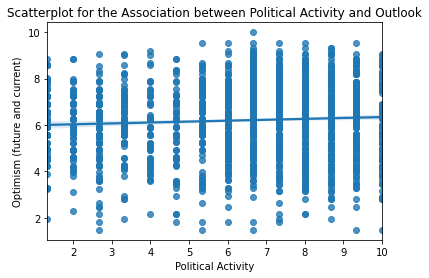

In [52]:
### the scatterplot ###
scat = seaborn.regplot(x="activeness", y="optimism", data=data)
plt.xlabel('Political Activity')
plt.ylabel('Optimism (future and current)')
plt.title('Scatterplot for the Association between Political Activity and Outlook')

Text(0.5, 1.0, 'Scatterplot for the Association between Political Activity and Outlook')

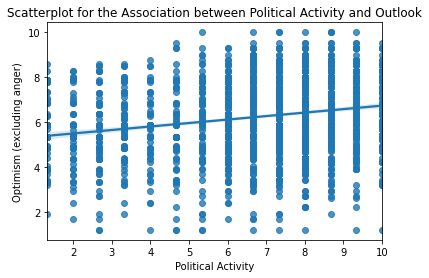

In [63]:
# since the anger question seems to indicate the opposite trend
# test what would happen if this variable were to be removed
data['optimism2'] = (data5a*10 + data['W1_F6']*7)/14    #have both on a scale of 1 to 10

scat2 = seaborn.regplot(x="activeness", y="optimism2", data=data)
plt.xlabel('Political Activity')
plt.ylabel('Optimism (excluding anger)')
plt.title('Scatterplot for the Association between Political Activity and Outlook')

In [72]:
#NOT POSSIBLE because there are only a few fixed values on the x axis (I think)

### try to get a categorical to quantitative bar chart ### 

# quartile split (use qcut function & ask for 4 groups - gives you quartile split)
# print("Political activity, 5 categories")
# data['activeness_cut']=pandas.qcut(data.activeness, 5)
# c_cut = data['activeness_cut'].value_counts(sort=False, dropna=True)
# print(c_cut)

Political activity, 5 categories
(1.332, 4.667]    489
(4.667, 6.667]    633
(6.667, 7.333]    287
(7.333, 8.667]    539
(8.667, 10.0]     311
Name: activeness_cut, dtype: int64
